## libraries importation

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cv2
from keras.layers import Activation
import seaborn as sns
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
import keras
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import optimizers
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import SGD,Adam
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout,Lambda
from sklearn.metrics import plot_confusion_matrix
from keras.models import load_model
import visualkeras as vk 
from sklearn.metrics import accuracy_score,confusion_matrix,plot_confusion_matrix
from keras.layers.advanced_activations import LeakyReLU

## data loading

In [4]:
traindata=pd.read_csv('emnist-byclass-train.csv')

In [5]:
testdata=pd.read_csv('emnist-byclass-test.csv')

## Data pre-processing

In [24]:
X=np.array(traindata.iloc[:,1:])
Y=np.array(traindata.iloc[:,0])

In [25]:
x=np.array(testdata.iloc[:,1:])
y=np.array(testdata.iloc[:,0])

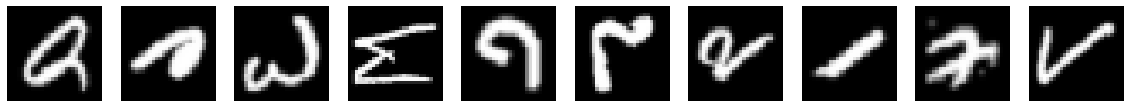

In [10]:
plt.figure(figsize=(20,20))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(X[i],cmap='gray')
    plt.axis('off')

plt.show()

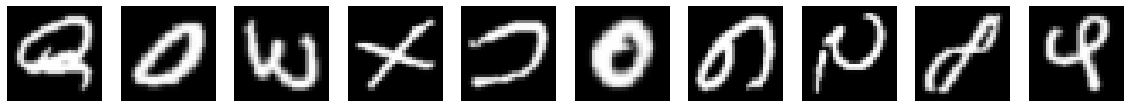

In [11]:
plt.figure(figsize=(20,20))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(x[i],cmap='gray')
    plt.axis('off')

plt.show()

In [26]:
#flip and rotation function
def rev90(img):
    img=img.reshape(28,28)
    imgg=cv2.flip(img,0)
    imgg = cv2.rotate(imgg, cv2.ROTATE_90_CLOCKWISE)
    return imgg

In [27]:
#decoding labels function 
def translate(pred):
    keywords={0:"0",1:"1",2:"2",3:"3",4:"4",5:"5",6:"6",7:"7",8:"8",9:"9",10:"A",11:"B",12:"C",13:"D",14:"E",15:"F",16:"G",17:"H",18:"I",19:"J",20:"K",21:"L",22:"M",23:"N",24:"O",25:"P",26:"Q",27:"R",28:"S",29:"T",30:"U",31:"V",32:"W",33:"X",34:"Y",35:"Z",36:"a",37:"b",38:"c",39:"d",40:"e",41:"f",42:"g",43:"h",44:"i",45:"j",46:"k",47:"l",48:"m",49:"n",50:"o",51:"p",52:"q",53:"r",54:"s",55:"t",56:"u",57:"v",58:"w",59:"x",60:"y",61:"z",  }
    return keywords[pred]

In [28]:
for i in range(len(x)):
    img=x[i]
    img=rev90(img)
    img=img.reshape(784,)
    x[i]=img

In [29]:
for i in range(len(X)):
    img=X[i]
    img=rev90(img)
    img=img.reshape(784,)
    X[i]=img

In [30]:
X = X.reshape(X.shape[0],28,28,1)
x=x.reshape(x.shape[0],28,28,1)

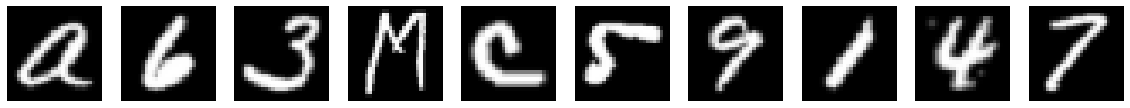

In [32]:
# train plot
plt.figure(figsize=(20,20))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(X[i],cmap='gray')
    plt.axis('off')

plt.show()

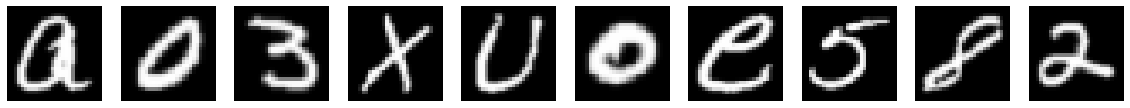

In [34]:
# test plot
plt.figure(figsize=(20,20))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(x[i],cmap='gray')
    plt.axis('off')

plt.show()

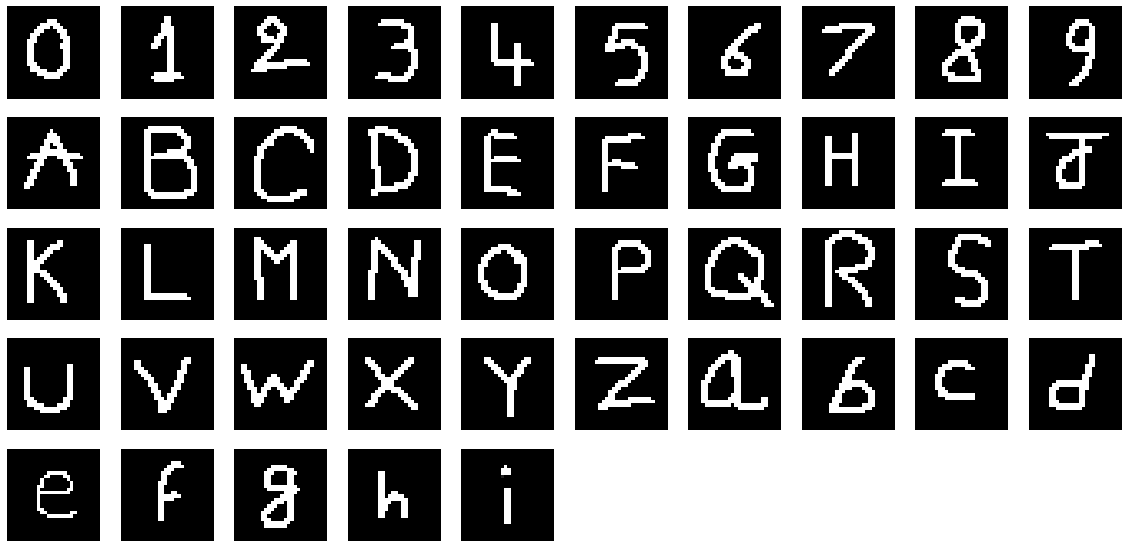

In [97]:
# our data plot
plt.figure(figsize=(20,20))
for i in range(len(imglist)):
    plt.subplot(10,10,i+1)
    plt.imshow(imglist[i],cmap='gray')
    plt.axis('off')

plt.show()

In [17]:
Y = Y.reshape(Y.shape[0],1)
y = y.reshape(y.shape[0],1)

In [18]:
#Data Normalization
X=X/255
x=x/255

In [19]:
Y = to_categorical(Y,num_classes=62, dtype='float32')
y = to_categorical(y,num_classes=62, dtype='float32')

## Model Creation

In [ ]:
model2= Sequential()
model2.add(Convolution2D(32,(3,3),input_shape=(28,28,1),activation='relu'))
model2.add(Convolution2D(32,(3,3),activation='relu'))

model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Dropout(0.25))
model2.add(Flatten())

model2.add(Dense(512, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(62, activation='softmax')) #classification layer

model2.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
training=model2.fit(X,Y,epochs=5,validation_data=(x,y))

In [36]:
model2=load_model('models/model2/model1_85-94.h5')

In [37]:
model2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_10 (Conv2D)          (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 12, 12, 32)        0         
                                                                 
 flatten_4 (Flatten)         (None, 4608)              0         
                                                                 
 dense_9 (Dense)             (None, 512)               2359808   
                                                      

In [2]:
# vk.layered_view(model2)

## Model test

In [61]:
#test with the test data by emnist
predict=model2.predict(x)

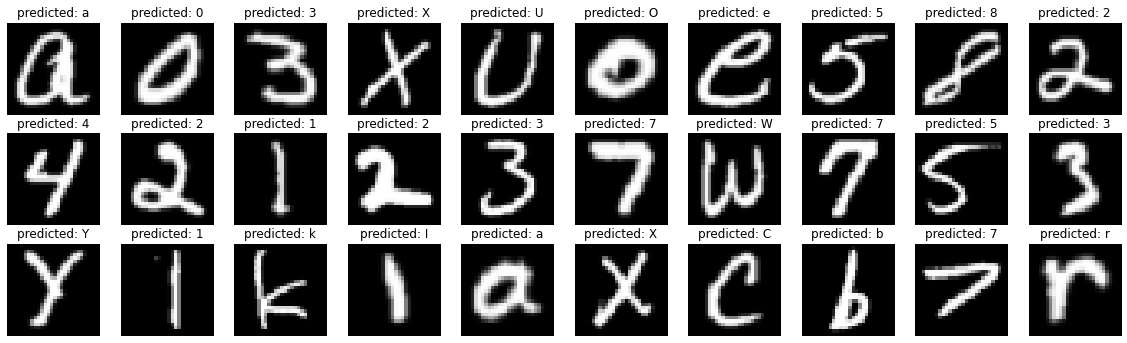

In [62]:
#plot with emnits data
plt.figure(figsize=(20,20))
for i in range(30):
    plt.subplot(10,10,i+1)
    plt.imshow(x[i], cmap='gray')
    pred = predict[i].argmax()
    fin=translate(pred)
    plt.title("predicted: {}".format(fin))
    plt.axis('off')

plt.show()

## loading and normalizing our dataset

In [82]:
imglist=[]

In [83]:
for i in range(45):
    im=cv2.imread('C:/Users/ACH/Desktop/P/img/{}.png'.format(i))
    im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    im = im.reshape(28,28,1)
    imglist.append(im)

In [84]:
imglist=np.array(imglist)
imglist=imglist/255

## test with the data by ourselves


In [ ]:
predict1=model2.predict(imglist)

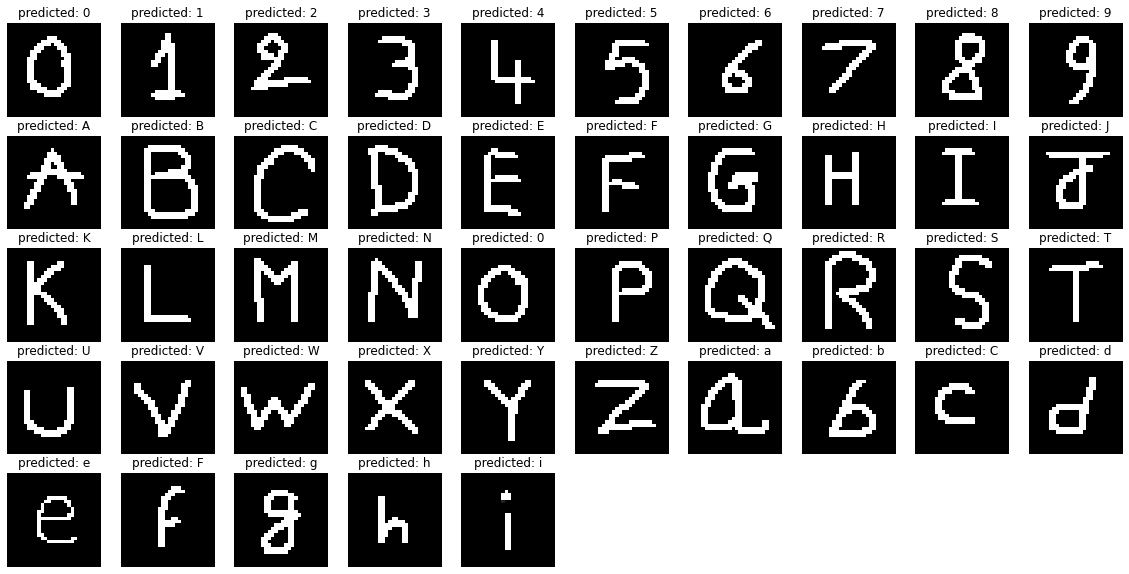

In [86]:
#plot with our data

plt.figure(figsize=(20,10))
for i in range(len(imglist)):
    plt.subplot(5,10,i+1)
    plt.imshow(imglist[i], cmap='gray')
    pred = predict1[i].argmax()
    fin=translate(pred)
    plt.title("predicted: {}".format(fin))
    plt.axis('off')

plt.show()